#Install and import libraries / data

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 34.6 MB 653 kB/s
     |████████████████████████████████| 10.1 MB 7.0 MB/s 
     |████████████████████████████████| 636 kB 41.8 MB/s 
     |████████████████████████████████| 102 kB 43.2 MB/s 
     |████████████████████████████████| 675 kB 44.0 MB/s 
     |████████████████████████████████| 3.1 MB 46.4 MB/s 
     |████████████████████████████████| 62 kB 926 kB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 812 kB 39.3 MB/s 
     |████████████████████████████████| 28.5 MB 31 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=91ad6383d69e56507d8205587680f09169e16aea8d821b38a558840a3eebcf3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ztp5p74f/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=877cfc764c4160a7652417e08d4db8cae4c9d1a53d98ab5d94618fad1a2dd562
  Sto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pylab 
import scipy.stats as stats
#from pandas_profiling import ProfileReport

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori, association_rules  
from mlxtend.preprocessing import TransactionEncoder
from pandas_profiling import ProfileReport
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from scipy.stats.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm
from scipy.integrate import odeint
import xgboost as xgb
from wordcloud import WordCloud,STOPWORDS

import os, sys, glob, datetime, warnings
from google.colab import files, drive
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%%shell
#https://drive.google.com/file/d/1I69hoWH73RYf8l6DJyixhdIaaKVfPceu/view?usp=sharing data
cd /content
gdown -q --id "1I69hoWH73RYf8l6DJyixhdIaaKVfPceu"

#Load Data

In [ ]:
data = pd.read_csv("grade.csv")
data.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6.0,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,NaN,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8.0,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14.0,15
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10.0,10
5,6,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,NaN,15
6,7,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12.0,11
7,8,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5.0,6
8,9,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,NaN,19
9,10,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15.0,15


In [ ]:
data.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.717949,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.737868,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         395 non-null    int64  
 4   address     395 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [ ]:
profile = ProfileReport(data)
profile

Output hidden; open in https://colab.research.google.com to view.

#Preprocessing

In [ ]:
data.head(5)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6.0,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,11.0,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8.0,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14.0,15
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10.0,10


In [ ]:
data['sex'] = data['sex'].map({'F': 1, 'M': 0})  
data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['paid'] = data['paid'].map({'yes': 1, 'no': 0})
data['activities'] = data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] = data['nursery'].map({'yes': 1, 'no': 0})
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})
data['romantic'] = data['romantic'].map({'yes': 1, 'no': 0})

In [ ]:
data.head(1)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,1,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6.0,6


In [ ]:
data["G2"].describe()

count    390.000000
mean      10.717949
std        3.737868
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [ ]:
data["G2"]

0       6.0
1       NaN
2       8.0
3      14.0
4      10.0
       ... 
390     9.0
391    16.0
392     8.0
393    12.0
394     9.0
Name: G2, Length: 395, dtype: float64

In [ ]:
data["G2"].fillna(int(data["G2"].median()), inplace = True)

In [ ]:
data["G2"].isnull().sum()

0

#Visualization

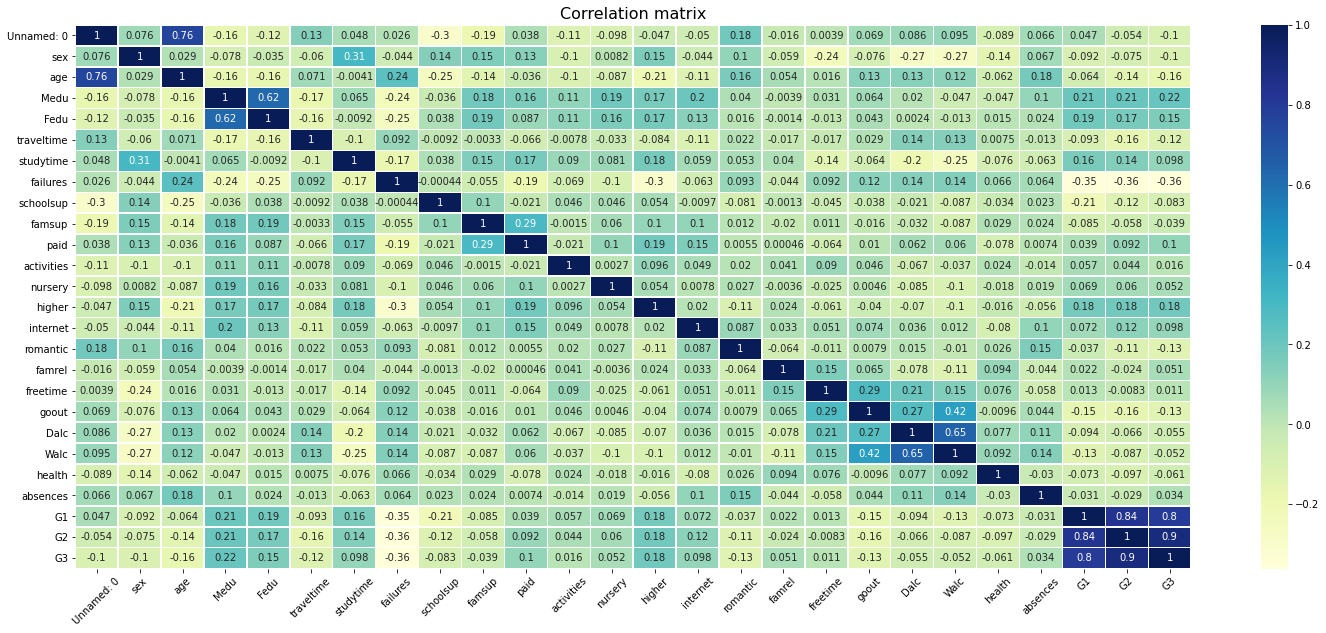

In [ ]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(25,10))  
sns.heatmap(corr_matrix, cmap="YlGnBu",linewidths=.5,annot=True)
plt.title("Correlation matrix", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,1,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6.0,6
1,2,GP,1,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,10.0,6
2,3,GP,1,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8.0,10
3,4,GP,1,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14.0,15
4,5,GP,1,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10.0,10


No handles with labels found to put in legend.


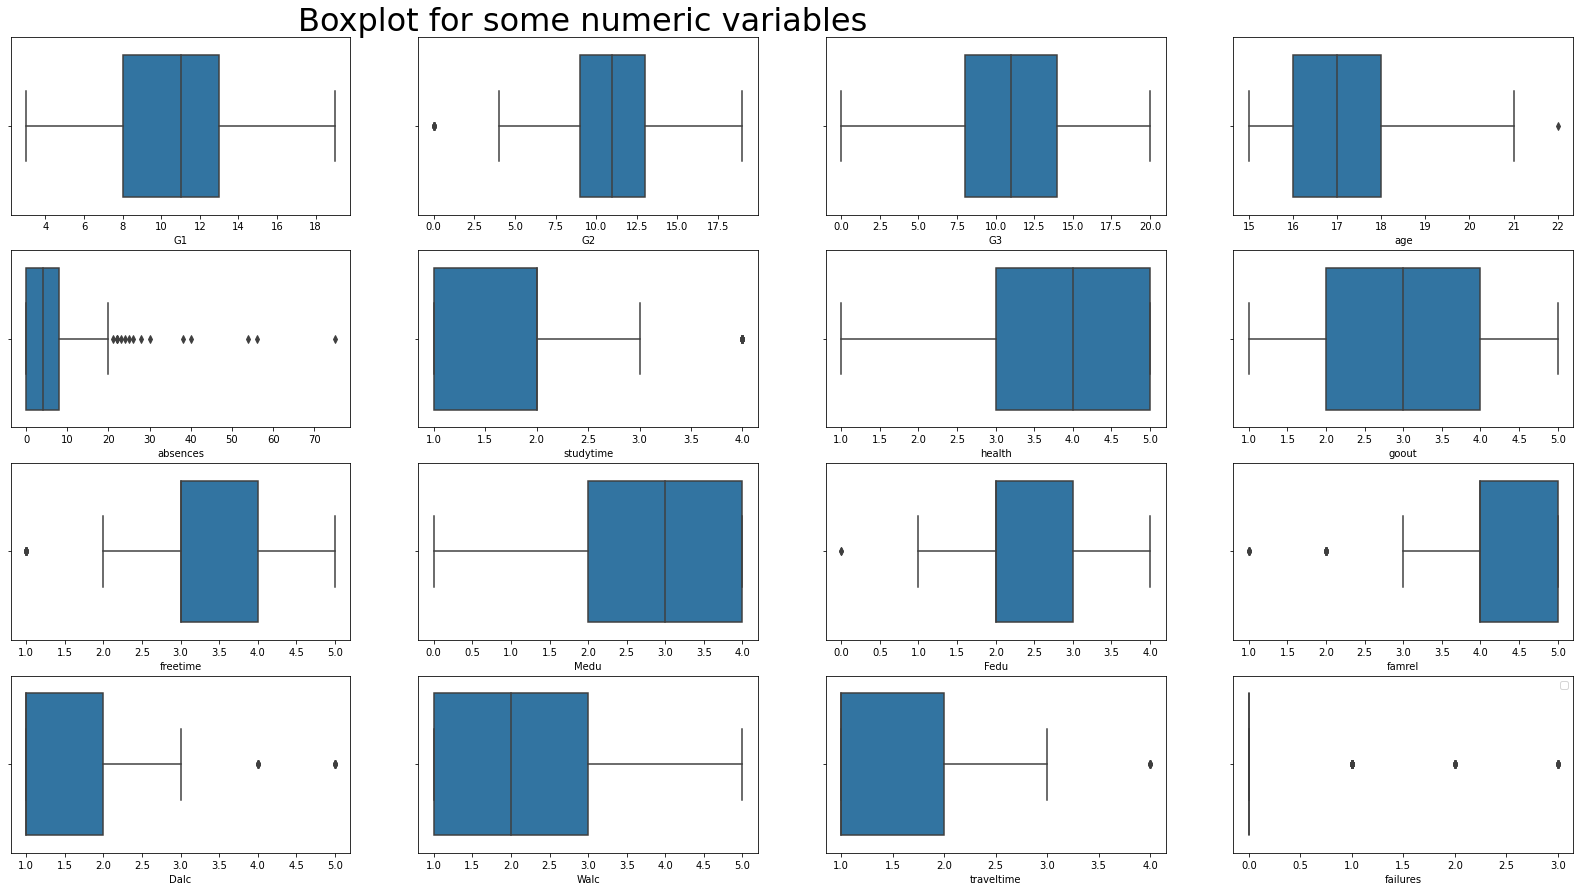

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize = (28, 15))

sns.boxplot(data["G1"], ax=axs[0][0])
sns.boxplot(data["G2"], ax=axs[0][1]).set_title('Boxplot for some numeric variables ', fontsize = 32)
sns.boxplot(data["G3"], ax=axs[0][2])
sns.boxplot(data["age"], ax=axs[0][3])
sns.boxplot(data["absences"], ax=axs[1][0])
sns.boxplot(data["studytime"], ax=axs[1][1])
sns.boxplot(data["health"], ax=axs[1][2])
sns.boxplot(data["goout"], ax=axs[1][3])
sns.boxplot(data["freetime"], ax=axs[2][0])

sns.boxplot(data["Medu"], ax=axs[2][1])
sns.boxplot(data["Fedu"], ax=axs[2][2])
sns.boxplot(data["famrel"], ax=axs[2][3])
sns.boxplot(data["Dalc"], ax=axs[3][0])
sns.boxplot(data["Walc"], ax=axs[3][1])
sns.boxplot(data["traveltime"], ax=axs[3][2])
sns.boxplot(data["failures"], ax=axs[3][3])
plt.legend()
plt.show()

No handles with labels found to put in legend.


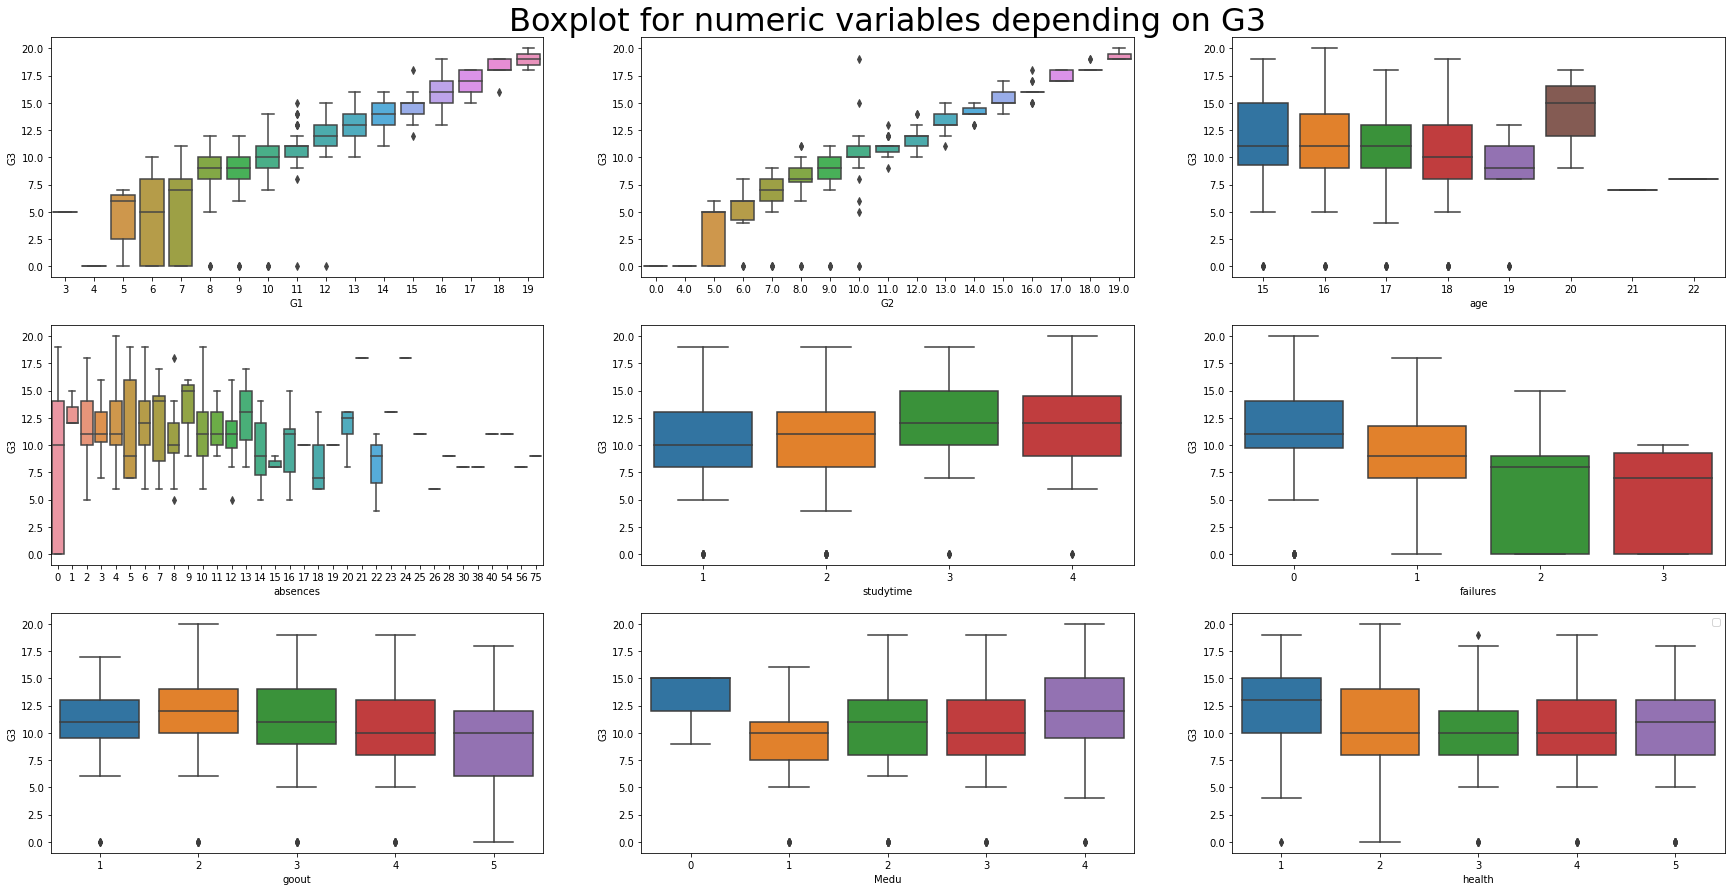

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (30, 15))
sns.boxplot(data["G1"],data["G3"], ax=axs[0][0])
sns.boxplot(data["G2"], data["G3"], ax=axs[0][1]).set_title('Boxplot for numeric variables depending on G3', fontsize = 32)
sns.boxplot(data["age"], data["G3"], ax=axs[0][2])
sns.boxplot(data["absences"], data["G3"], ax=axs[1][0])
sns.boxplot(data["studytime"], data["G3"], ax=axs[1][1])
sns.boxplot(data["failures"], data["G3"], ax=axs[1][2])
sns.boxplot(data["goout"], data["G3"], ax=axs[2][0])
sns.boxplot(data["Medu"], data["G3"], ax=axs[2][1])
sns.boxplot(data["health"], data["G3"], ax=axs[2][2])
plt.legend()
plt.show()

No handles with labels found to put in legend.


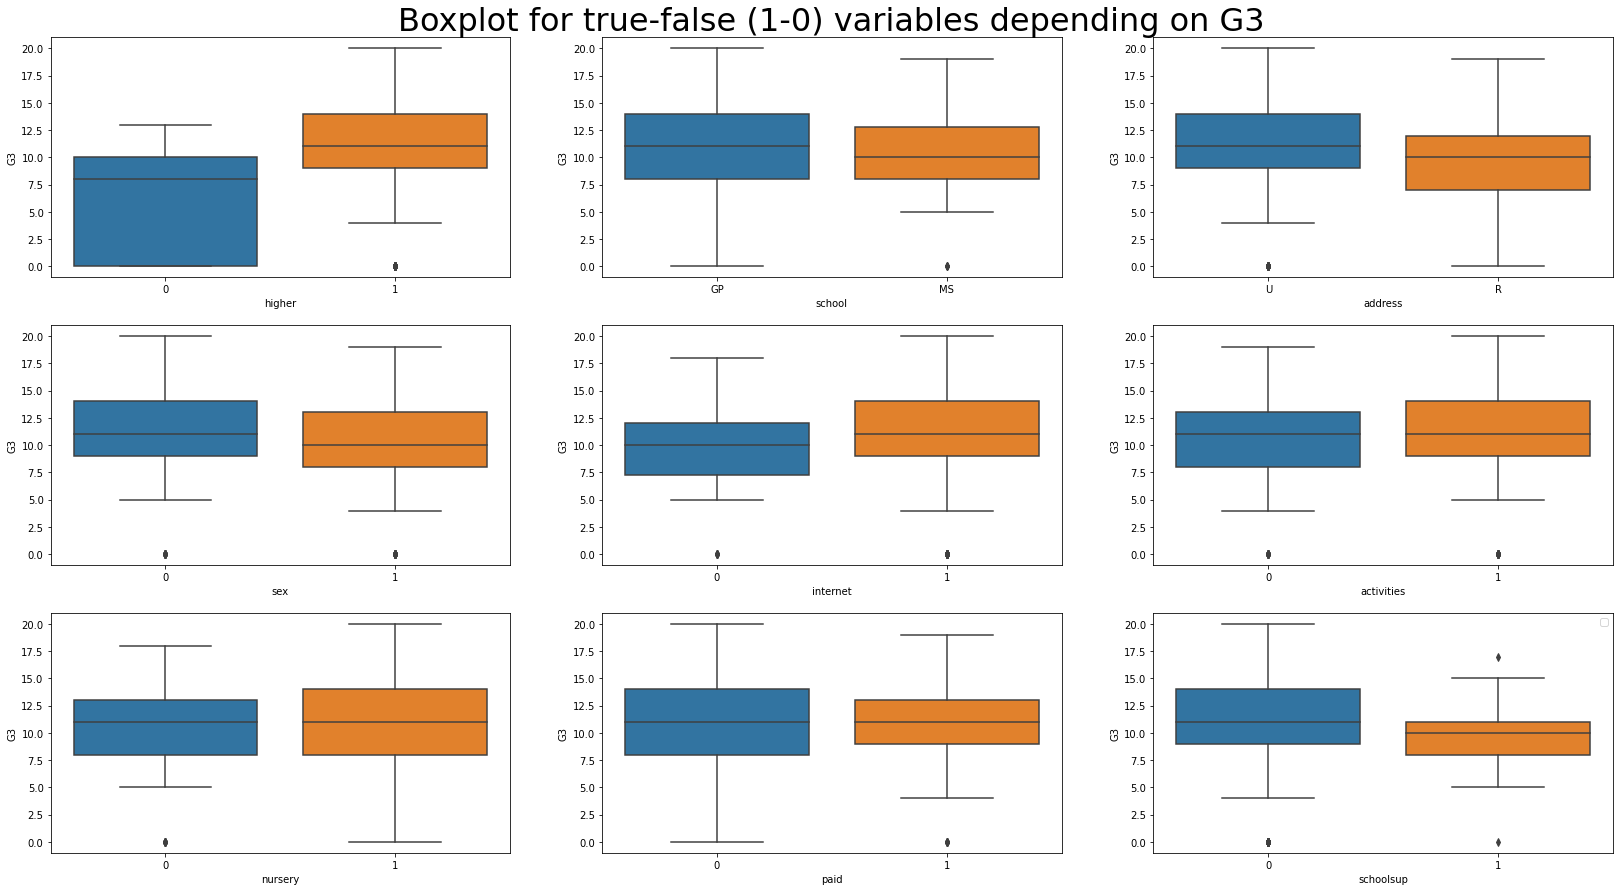

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (28, 15))
sns.boxplot(data["higher"], data["G3"], ax=axs[0][0])
sns.boxplot(data["school"], data["G3"], ax=axs[0][1]).set_title('Boxplot for true-false (1-0) variables depending on G3', fontsize = 32)
sns.boxplot(data["address"], data["G3"], ax=axs[0][2])
sns.boxplot(data["sex"], data["G3"], ax=axs[1][0])
sns.boxplot(data["internet"], data["G3"], ax=axs[1][1])
sns.boxplot(data["activities"], data["G3"], ax=axs[1][2])
sns.boxplot(data["nursery"], data["G3"], ax=axs[2][0])
sns.boxplot(data["paid"], data["G3"], ax=axs[2][1])
sns.boxplot(data["schoolsup"], data["G3"], ax=axs[2][2])
#sns.boxplot(data["Medu"], data["G3"], ax=axs[3][0])
#sns.boxplot(data["goout"], data["G3"], ax=axs[3][1])
#sns.boxplot(data["health"], data["G3"], ax=axs[3][2])
#sns.boxplot(data["studytime"], data["G3"], ax=axs[4][0])
#sns.boxplot(data["failures"], data["G3"], ax=axs[4][1])
#sns.boxplot(data["age"], data["G3"], ax=axs[4][2])
plt.legend()
plt.show()

No handles with labels found to put in legend.


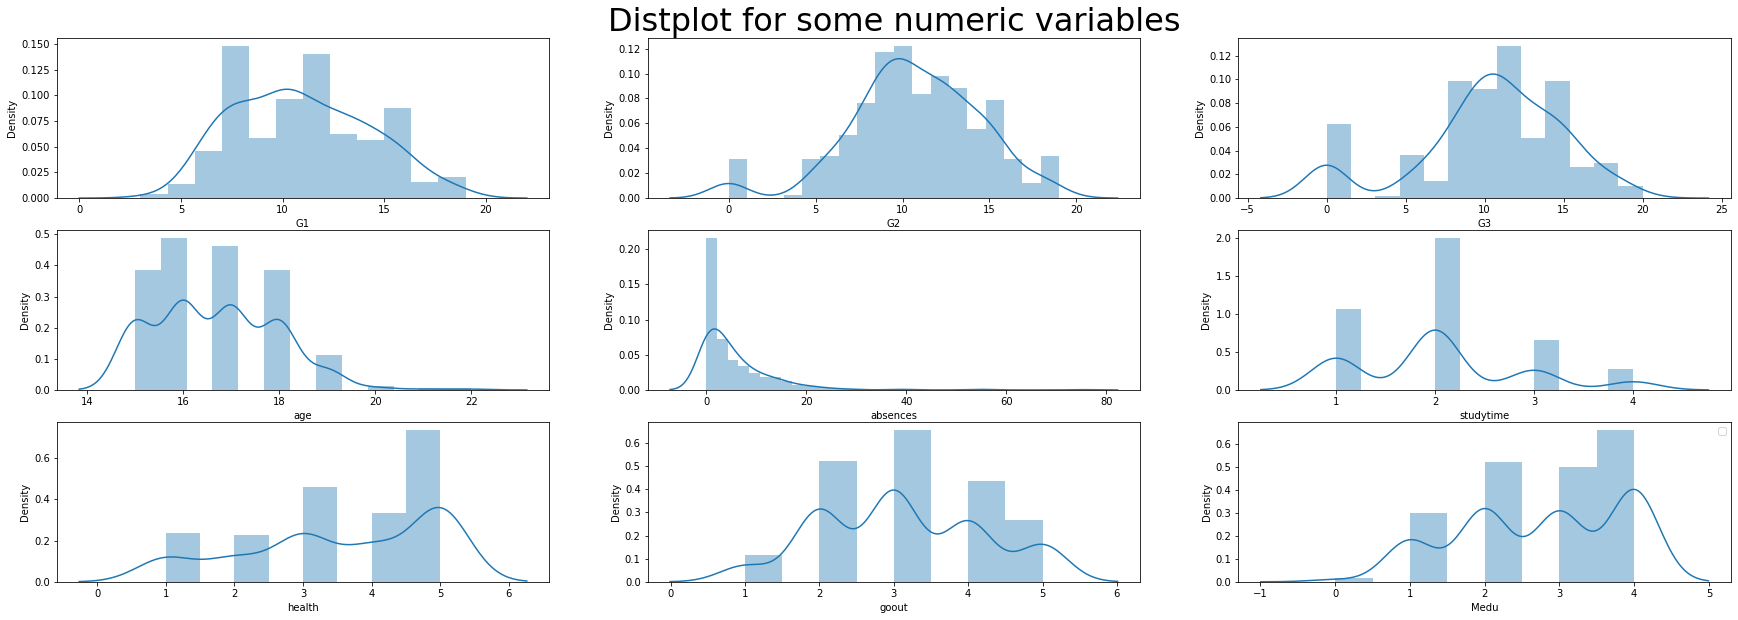

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (30, 10))
sns.distplot(data["G1"], ax=axs[0][0])
sns.distplot(data["G2"], ax=axs[0][1]).set_title('Distplot for some numeric variables', fontsize = 32)
sns.distplot(data["G3"],ax=axs[0][2])
sns.distplot(data["age"], ax=axs[1][0])
sns.distplot(data["absences"], ax=axs[1][1])
sns.distplot(data["studytime"], ax=axs[1][2])
sns.distplot(data["health"], ax=axs[2][0])
sns.distplot(data["goout"], ax=axs[2][1])
sns.distplot(data["Medu"], ax=axs[2][2])

plt.legend()
plt.show()

No handles with labels found to put in legend.


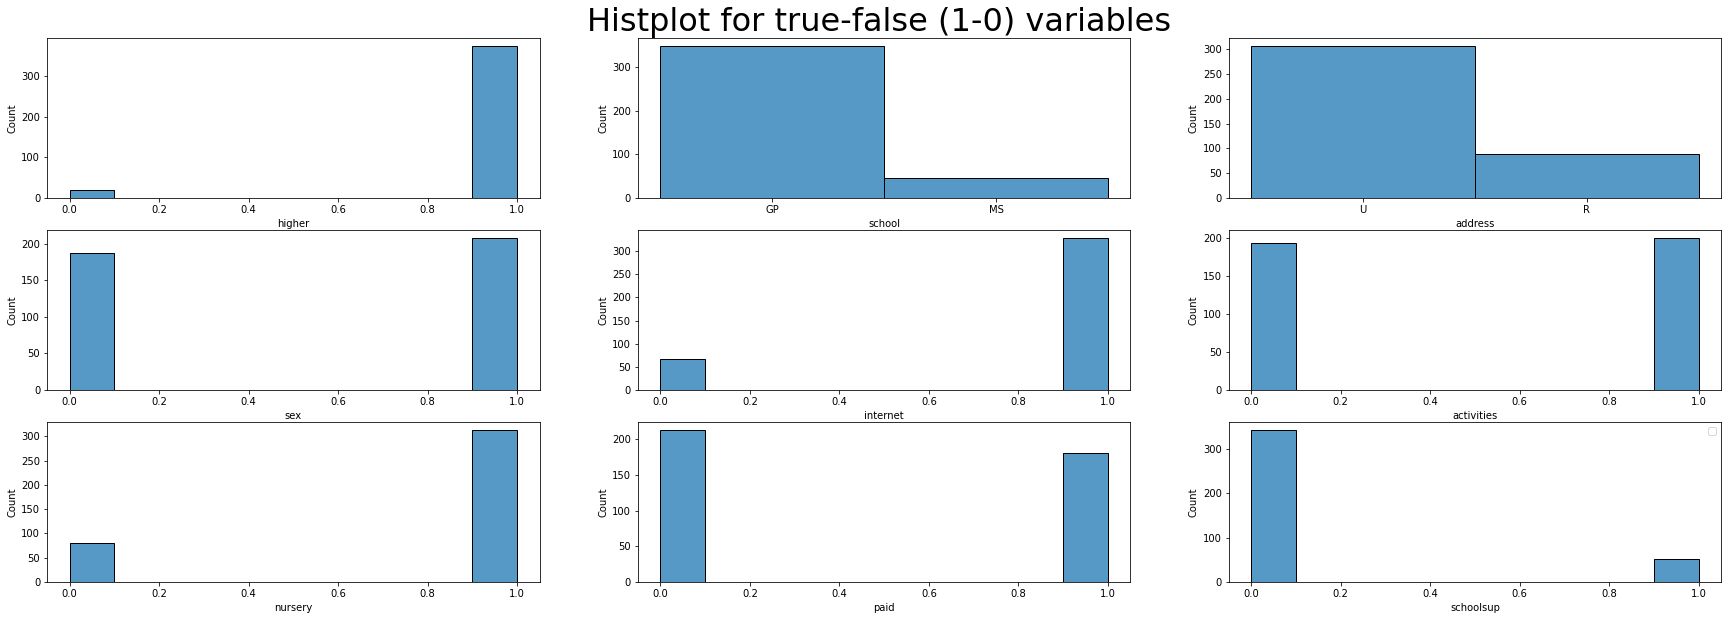

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (30, 10))
sns.histplot(data["higher"], ax=axs[0][0])
sns.histplot(data["school"], ax=axs[0][1]).set_title('Histplot for true-false (1-0) variables ', fontsize = 32)
sns.histplot(data["address"],ax=axs[0][2])
sns.histplot(data["sex"], ax=axs[1][0])
sns.histplot(data["internet"], ax=axs[1][1])
sns.histplot(data["activities"], ax=axs[1][2])
sns.histplot(data["nursery"], ax=axs[2][0])
sns.histplot(data["paid"], ax=axs[2][1])
sns.histplot(data["schoolsup"], ax=axs[2][2])

plt.legend()
plt.show()

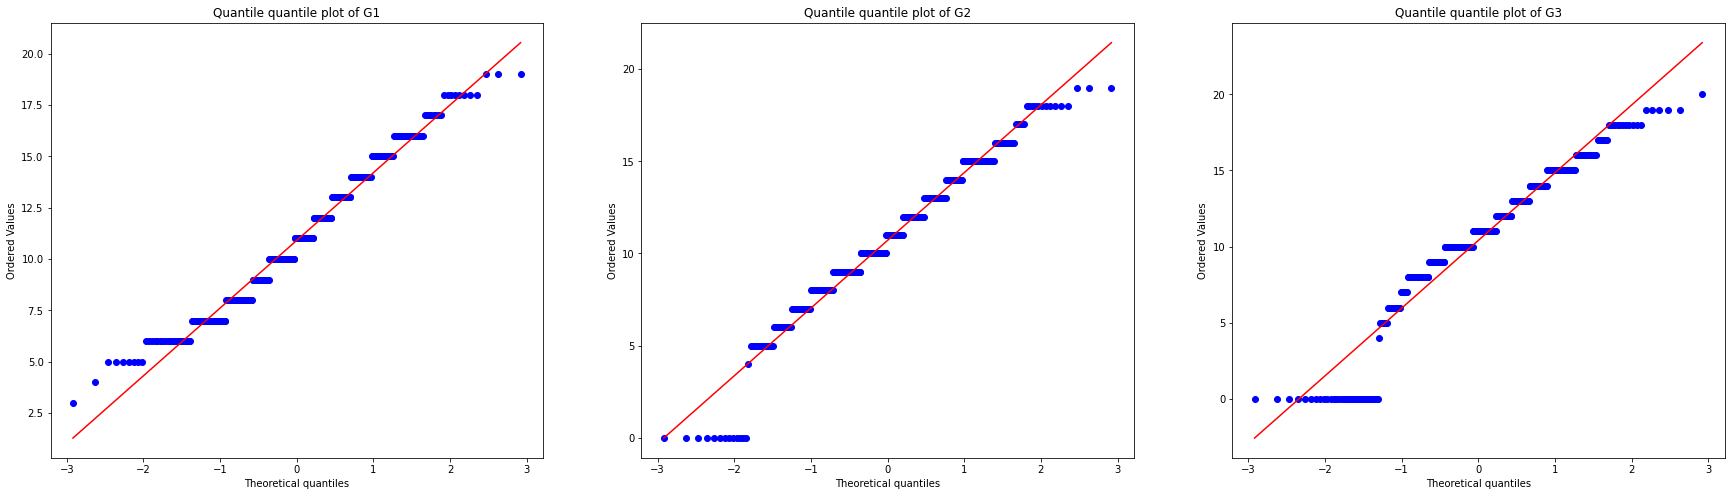

In [ ]:
plt.figure(figsize = (30, 8))
plt.subplot(1,3,1)
stats.probplot(data["G1"], dist="norm", plot=pylab)
pylab.title("Quantile quantile plot of G1")
plt.subplot(1,3,2)
stats.probplot(data["G2"], dist="norm", plot=pylab)
pylab.title("Quantile quantile plot of G2")
plt.subplot(1,3,3)
stats.probplot(data["G3"], dist="norm", plot=pylab)
pylab.title("Quantile quantile plot of G3")
plt.show()
pylab.show()

In [ ]:
df2 = data.drop(['sex', 'age', 'health', 'famrel', 'Medu', 'Fedu', 'Dalc', 'Walc', 'romantic'], axis=1)

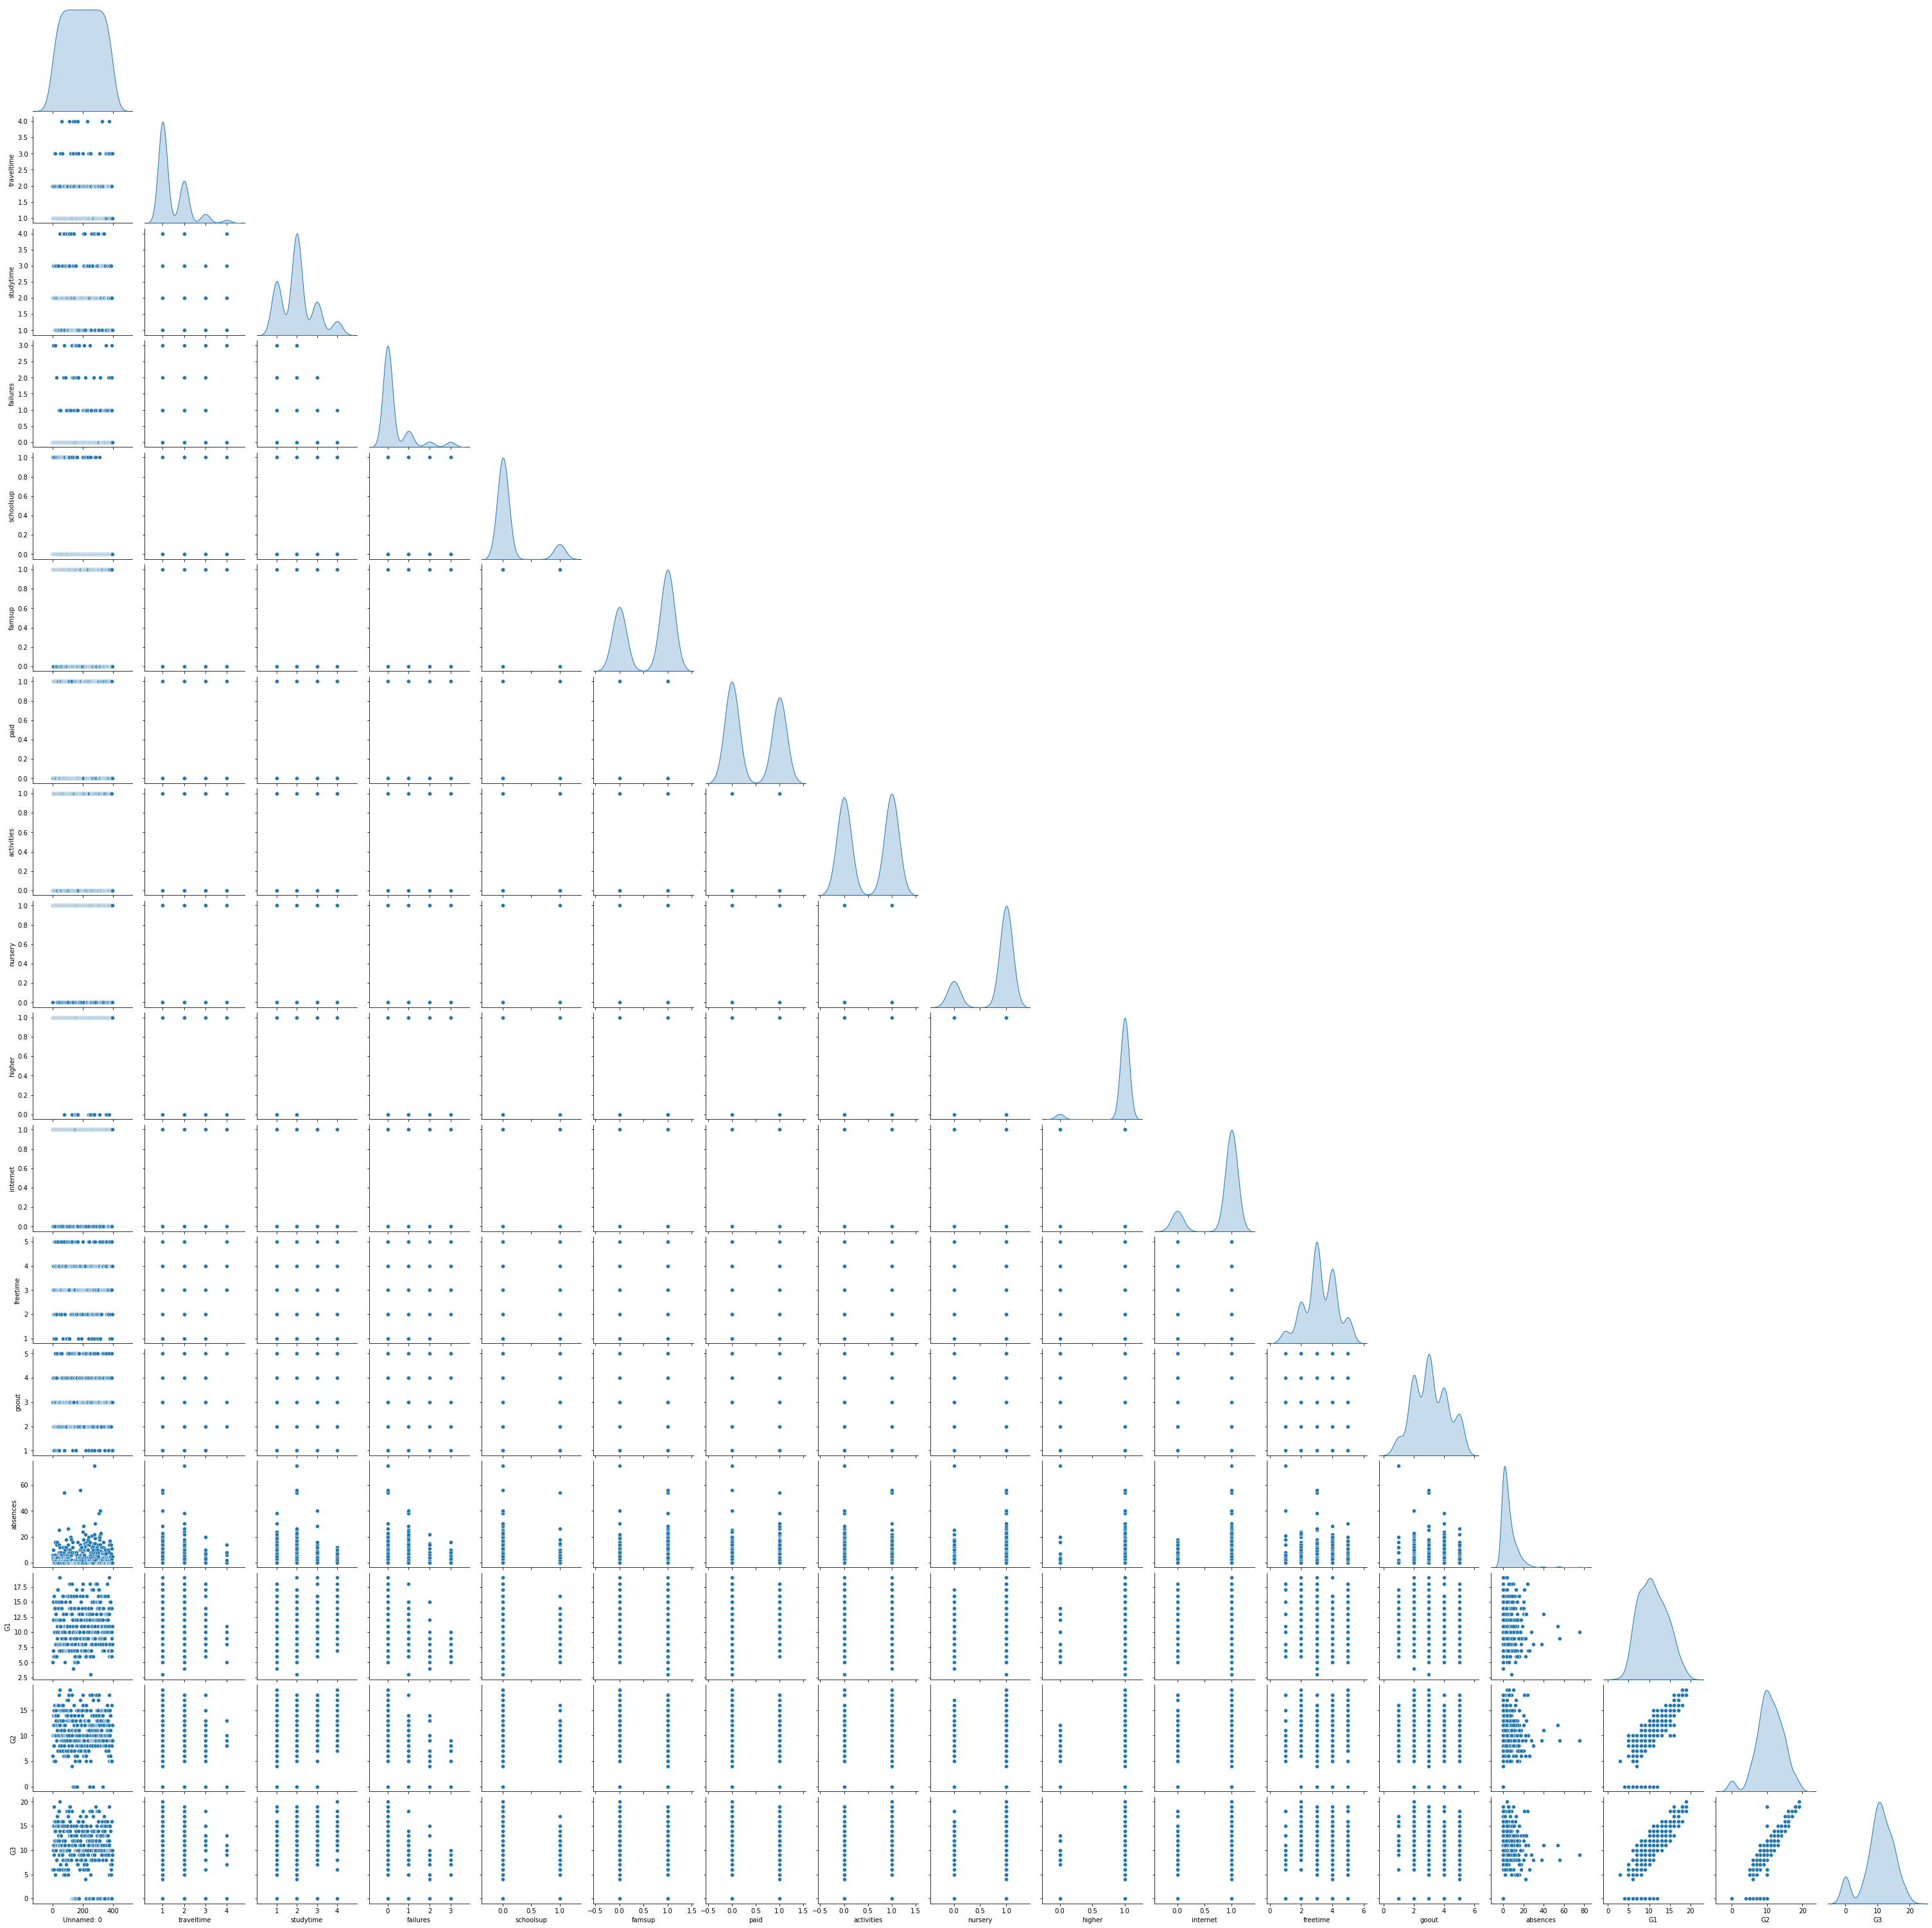

In [ ]:
sns.pairplot(df2, diag_kind="kde",corner=True)

#Build Model Prediction

In [ ]:
X = data[['G1',
        'G2',
        'Medu',
        'higher']] #input
y = data[['G3']] #output

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25 ,random_state = 42)

##Multiple Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
print(model.intercept_)
print(model.coef_)

[-2.591701]
[[0.23478403 0.9251308  0.02192067 0.49831672]]


In [ ]:
print("R^2 on original data: ", model.score(X,y)) #R^2
print("R^2 on train: ",model.score(X_train, y_train))
print("R^2 on test: ",model.score(X_test, y_test))
print("MSE (on train): ", mean_squared_error(y_train, model.predict(X_train)))
print("MSE: ", mean_squared_error(y_pred, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))
print("MAE: ", mean_absolute_error(y_pred, y_test))

R^2 on original data:  0.8102967208312017
R^2 on train:  0.8114551949160398
R^2 on test:  0.8071664197722208
MSE (on train):  3.8142707032505205
MSE:  4.442471728798201
RMSE:  2.1077171842536657
MAE:  1.2815380656529562


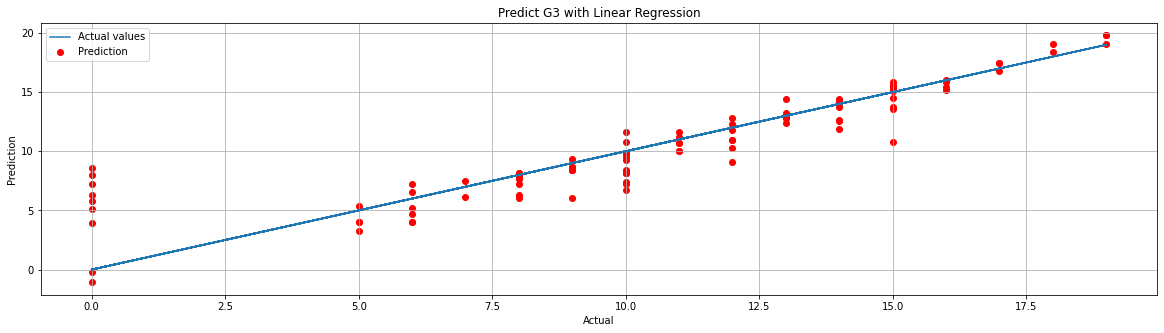

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(y_test, y_test, label="Actual values")
plt.scatter(y_test,y_pred, color="red", label="Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Predict G3 with Linear Regression")
plt.grid()
plt.legend()
plt.show()

##Random Forest

In [ ]:
rrf = RandomForestRegressor(n_estimators=100)
model_rrf = rrf.fit(X_train, y_train)
y_rrf_pred = model_rrf.predict(X_test)

In [ ]:
print("R^2 on original data: ", rrf.score(X,y)) #R^2
print("R^2 on train: ", rrf.score(X_train, y_train))
print("R^2 on test: ", rrf.score(X_test,y_test))

print("MSE (on train): ", mean_squared_error(y_train, rrf.predict(X_train)))

print("MSE: ", mean_squared_error(y_rrf_pred, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_rrf_pred, y_test)))
print("MAE: ", mean_absolute_error(y_rrf_pred, y_test))

R^2 on original data:  0.8696114999588751
R^2 on train:  0.9040365940525538
R^2 on test:  0.7791675470541892
MSE (on train):  1.9413444338945602
MSE:  5.08750565048938
RMSE:  2.2555499663029814
MAE:  1.4106205926508957


In [ ]:
df_rff = pd.DataFrame({'Actual': pd.DataFrame(y_test)[0].values,
'Prediction': pd.DataFrame(rrf.predict(X_test))[0].values})
df_rff.head(15)

,Actual,Prediction
0,10,6.080667
1,12,12.400000
2,5,0.978333
3,10,9.236667
4,9,6.482448
5,13,13.577643
6,18,18.620000
7,6,7.742667
8,0,5.727929
9,14,13.335619


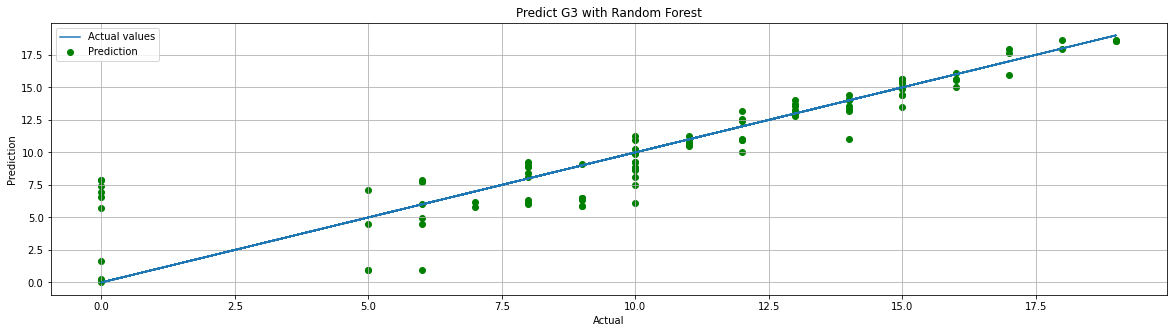

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(y_test, y_test, label="Actual values")
plt.scatter(df_rff['Actual'],df_rff['Prediction'], color="green", label="Prediction")
plt.title("Predict G3 with Random Forest")
plt.grid()
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend()
plt.show()

##XGB

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

[06:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("R^2 on original data: ", xgb_model.score(X.values,y)) #R^2
print("R^2 on train: ", xgb_model.score(X_train, y_train))
print("R^2 on test: ", xgb_model.score(X_test,y_test))
print("MSE (on train): ", mean_squared_error(y_train, xgb_model.predict(X_train)))
print("MSE: ", mean_squared_error(y_pred_xgb, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_pred_xgb, y_test)))
print("MAE: ", mean_absolute_error(y_pred_xgb, y_test))

R^2 on original data:  0.840100476755158
R^2 on train:  0.8637547456359126
R^2 on test:  0.7779214847215562
MSE (on train):  2.756248213502561
MSE:  5.116212251686659
RMSE:  2.26190456290416
MAE:  1.3820683564802614


In [ ]:
df_xgb = pd.DataFrame({'Actual': pd.DataFrame(y_test)[0].values,
'Prediction': pd.DataFrame(xgb_model.predict(X_test))[0].values})
df_xgb.head()

,Actual,Prediction
0,10,6.056290
1,12,12.114444
2,5,1.139884
3,10,8.785777
4,9,7.147935


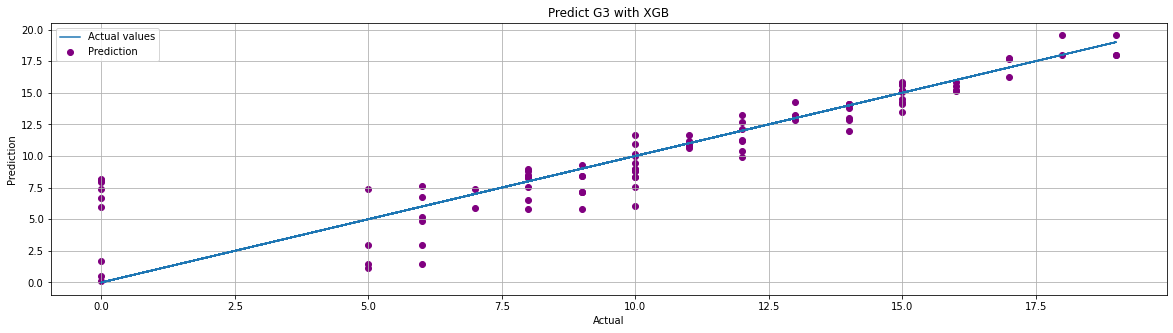

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(y_test, y_test, label="Actual values")
plt.scatter(df_xgb['Actual'],df_xgb['Prediction'], color="purple", label="Prediction")
plt.title("Predict G3 with XGB")
plt.grid()
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend()
plt.show()

##Compare models

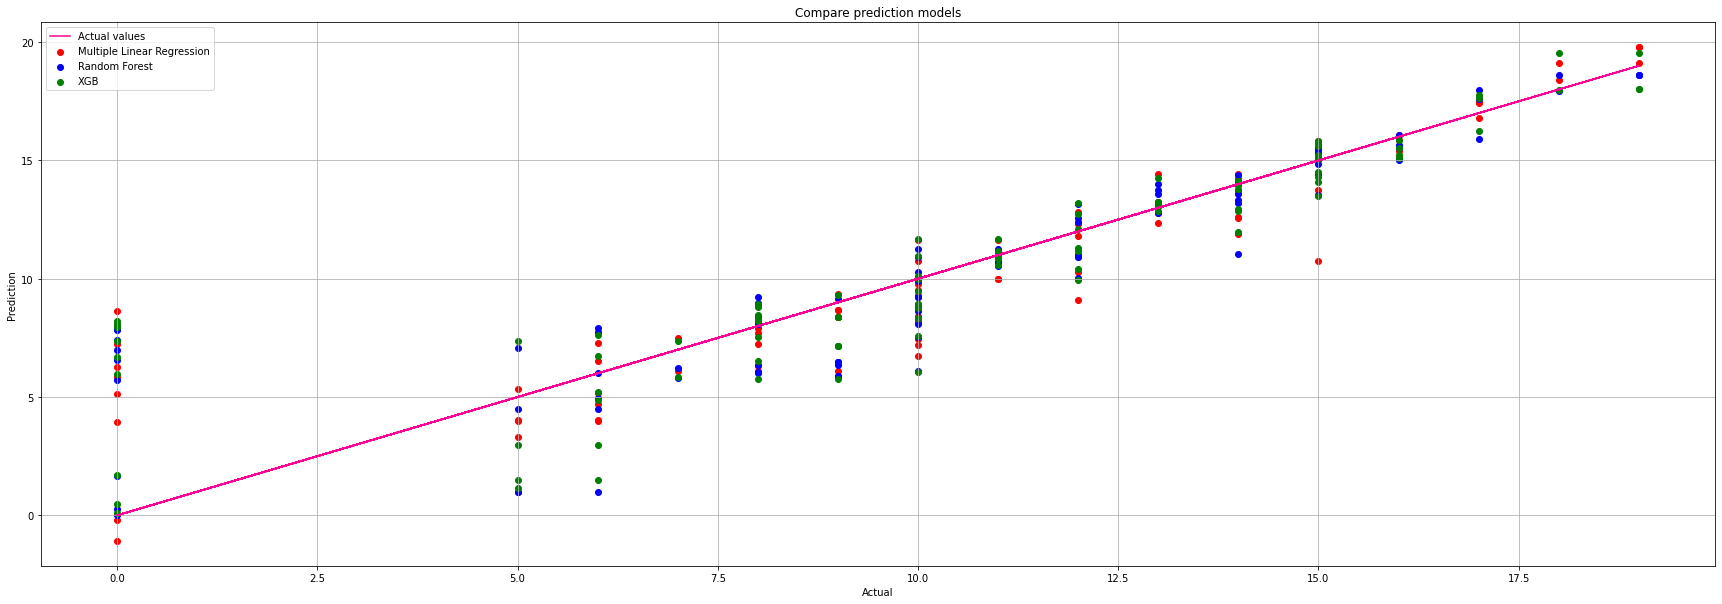

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(y_test, y_test, label="Actual values", color="#fc0398")
plt.scatter(y_test, y_pred, color='red', label="Multiple Linear Regression")
plt.scatter(y_test, df_rff['Prediction'], color='blue', label="Random Forest")
plt.scatter(y_test, df_xgb['Prediction'], color='green', label="XGB")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Compare prediction models")
plt.grid()
plt.legend()
plt.show()

In [ ]:
models = ["Multiple Linear Regression","Random Forest", "XGB"]
errors_mse = [mean_squared_error(y_pred, y_test), mean_squared_error(y_rrf_pred, y_test), mean_squared_error(y_pred_xgb, y_test)]
errors_mae = [mean_absolute_error(y_pred, y_test), mean_absolute_error(y_rrf_pred, y_test), mean_absolute_error(y_pred_xgb, y_test)]
r2_train = [model.score(X_train, y_train), rrf.score(X_train, y_train), xgb_model.score(X_train, y_train)]
r2_test = [model.score(X_test,y_test), rrf.score(X_test,y_test), xgb_model.score(X_test,y_test)]

df_error = pd.DataFrame({'Model name':models, 'R2 Train':r2_train, 'R2 Test':r2_test, 'MSE':errors_mse, 'MAE':errors_mae})
df_error

,Model name,R2 Train,R2 Test,MSE,MAE
0,Multiple Linear Regression,0.811455,0.807166,4.442472,1.281538
1,Random Forest,0.904037,0.779168,5.087506,1.410621
2,XGB,0.863755,0.777921,5.116212,1.382068


No handles with labels found to put in legend.


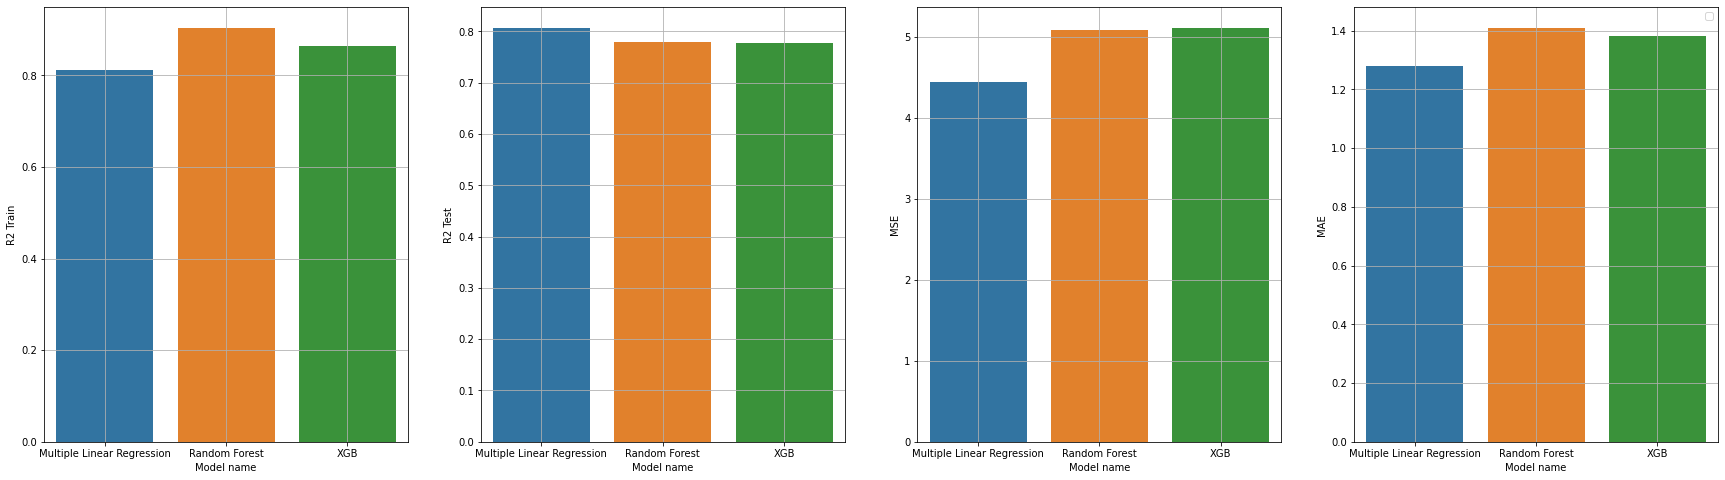

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(1,4,1)
sns.barplot(df_error['Model name'], df_error['R2 Train'])
plt.grid()

plt.subplot(1,4,2)
sns.barplot(df_error['Model name'], df_error['R2 Test'])
plt.grid()

plt.subplot(1,4,3)
sns.barplot(df_error['Model name'], df_error['MSE'])
plt.grid()

plt.subplot(1,4,4)
sns.barplot(df_error['Model name'], df_error['MAE'])

plt.grid()
plt.legend()
plt.show()

#Predict

In [ ]:
X_pred = [[9,13,3,1]]      #modify the input values here  (G1, G2, Medu, higher respectively)
y_pred_ = [model.predict(X_pred), rrf.predict(X_pred), xgb_model.predict(X_pred)]

models = ["Multiple Linear Regression","Random Forest", "XGB"]
df_pred = pd.DataFrame({'Model name':models, 'Predicted Values':y_pred_})
df_pred

,Model name,Predicted Values
0,Multiple Linear Regression,[[12.11213446043477]]
1,Random Forest,[13.03]
2,XGB,[12.7362795]


#Code chay Linear regression (k xài tool)

In [ ]:
X1 = X
X1

,G1,G2,Medu,higher
0,5,6.0,4,1
1,5,10.0,1,1
2,7,8.0,1,1
3,15,14.0,4,1
4,6,10.0,3,1
...,...,...,...,...
390,9,9.0,2,1
391,14,16.0,3,1
392,10,8.0,1,1
393,11,12.0,3,1


In [ ]:
y1 = y
y1

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


In [ ]:
m = y.size
m

395

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# implement the featureNormalize function
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X1.values)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [10.90886076 10.70886076  2.74936709  0.94936709]
Computed standard deviation: [3.3149905  3.71023865 1.09334852 0.21924694]


In [ ]:
# Add intercept term to X
X1 = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

##Gradient Descent
In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] # number of training examples 
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # number of training examples
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

### Selecting learning rates
Try out different learning rates for the dataset and find a learning rate that converges quickly. 

In [ ]:
# Choose some alpha values (learning rate) to evaluate what is the best learning rate

alpha = 0.1    # change these values if you want
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X1, y1, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('Theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

ValueError: ignored